# Understanding India's High-Skilled Labour Market

In [77]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [78]:
data = pd.read_excel('train.xlsx')
data.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Ten highest paying positions

In [10]:
salary_by_designation = data[['Designation','Salary']].groupby('Designation',as_index=False).mean().sort('Salary',ascending=False).head(10)
salary_by_designation.head()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Designation,Salary
177,junior manager,1300000
308,senior developer,1110000
75,data scientist,896666
122,field engineer,801666
36,asst. manager,800000


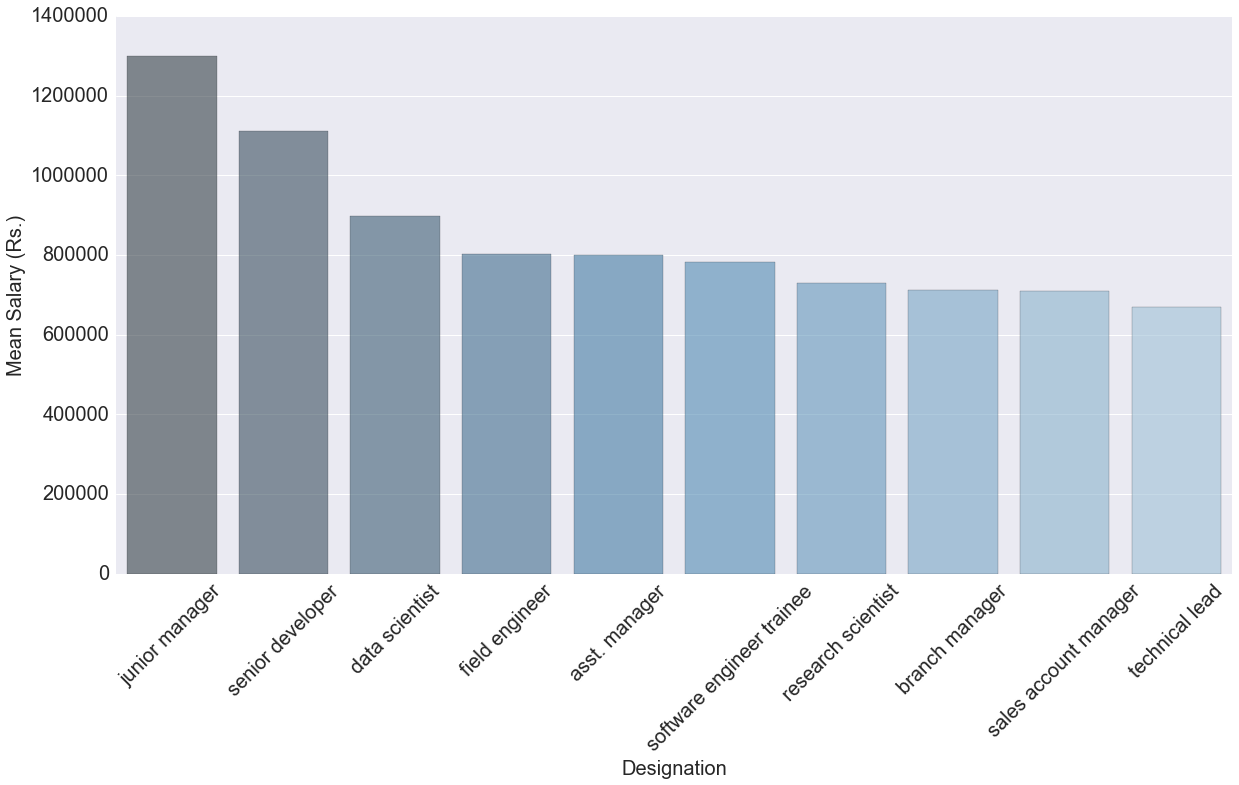

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary', data=salary_by_designation, alpha=0.6, palette='Blues_d')
plt.xticks(rotation=45)
plt.ylabel("Mean Salary (Rs.)")
plt.show()

## Cities with maximum jobs

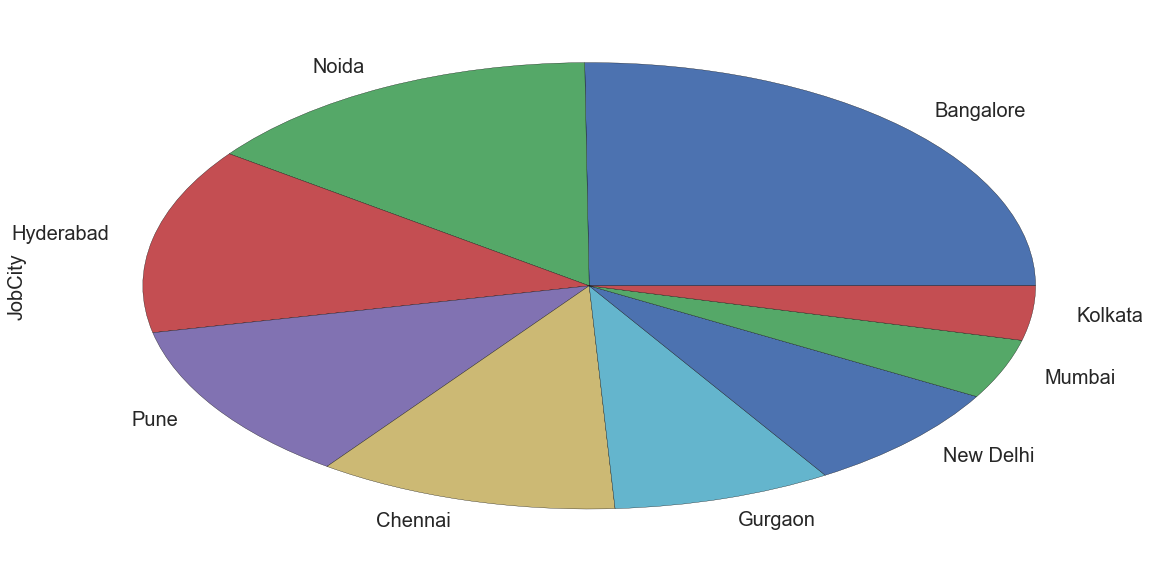

In [57]:
plt.figure(figsize=(20,10))
job_cities = data['JobCity'].value_counts().head(10)
job_cities = job_cities.drop([-1]) #drop invalid index -1
job_cities.plot(kind='pie')

## Most popular technical courses

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

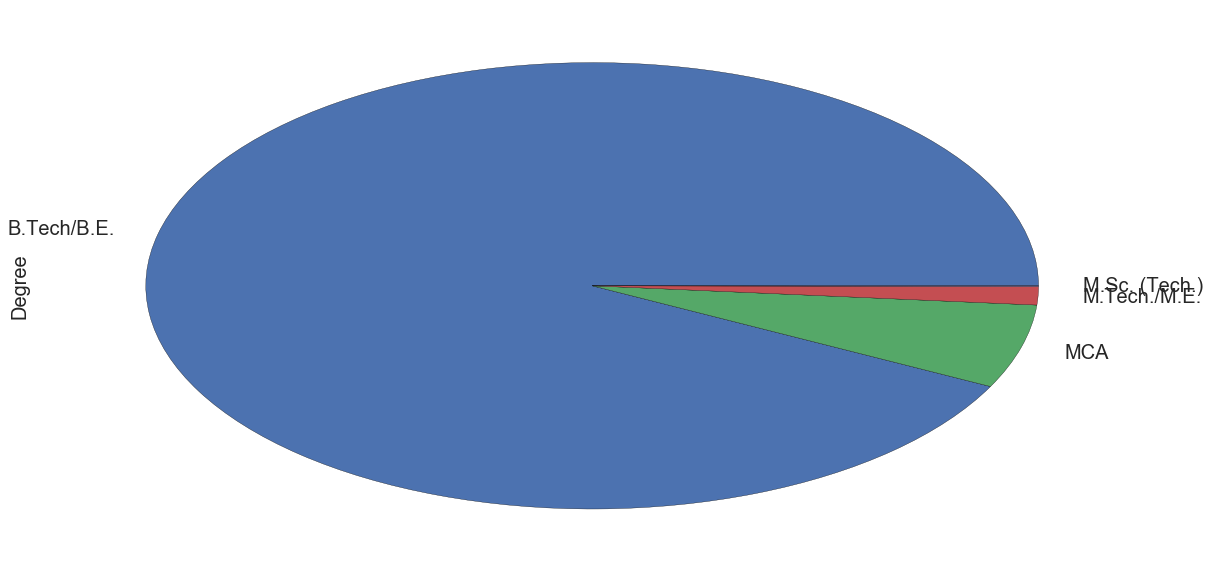

In [72]:
plt.figure(figsize=(20,10))
courses = data['Degree'].value_counts()
courses.plot(kind='pie')
plt.xticks(rotation=45)

#### Perception: There is a linear relation between GPA & Salary. 
#### Is there?

Normalize Salary

In [60]:
mean_salary = data.Salary.dropna().mean() 
max_salary = data.Salary.dropna().max()
min_salary = data.Salary.dropna().min()
data['Salary'] = data['Salary'].apply(lambda x: (x - mean_salary ) / (max_salary -min_salary ))

Normalize GPA

In [61]:
mean_gpa = data.collegeGPA.dropna().mean() 
max_gpa = data.collegeGPA.dropna().max()
min_gpa = data.collegeGPA.dropna().min()
data['collegeGPA'] = data['collegeGPA'].apply(lambda x: (x - mean_gpa ) / (max_gpa -min_gpa ))

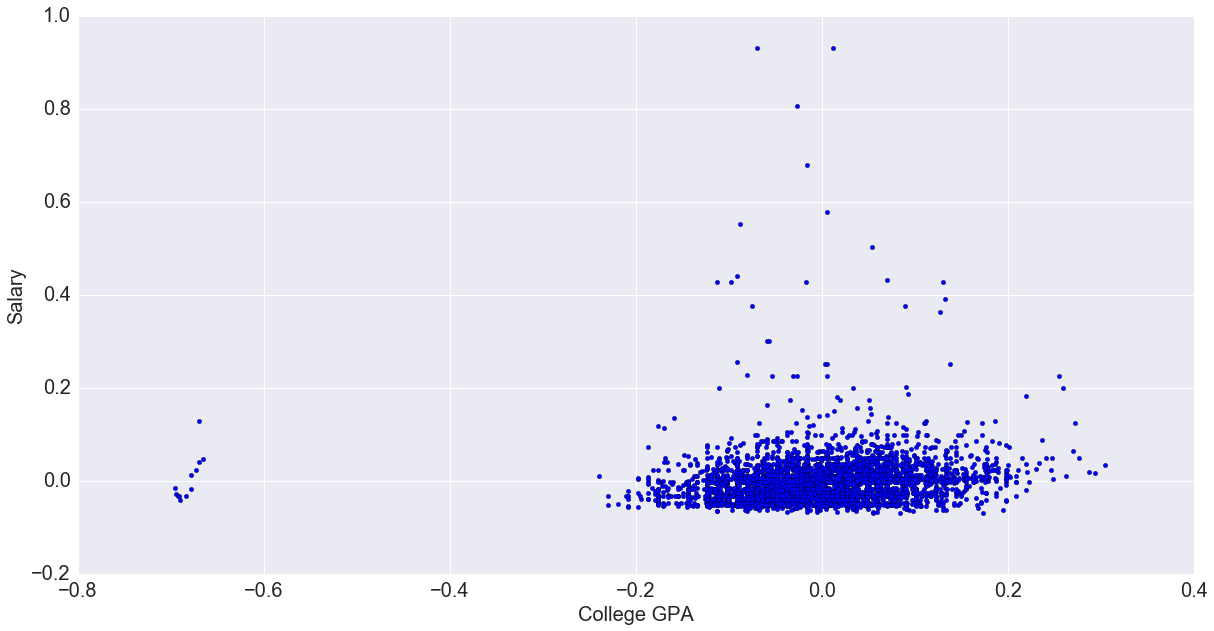

In [63]:
plt.figure(figsize=(20,10))
plt.scatter(data['collegeGPA'],data['Salary'])
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()

*We have still not taken into account year of graduation,work experience, degree,college, age etc, but for now, as it may seem, that there is NO correlation between College GPA & the salary offered.*

## Most common professions

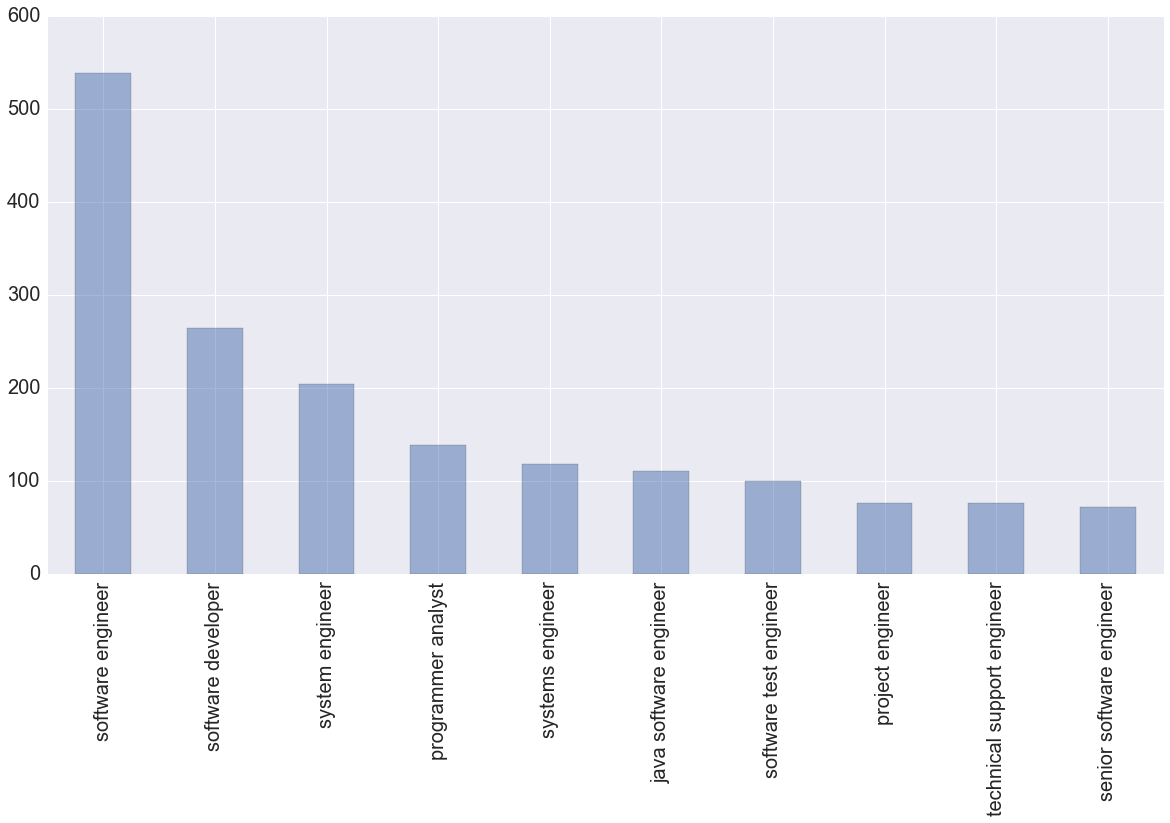

In [69]:
plt.figure(figsize=(20,10))
profession = data['Designation'].value_counts().head(10)
profession.plot(kind='bar',alpha=0.5)

## Calculating Underemployment

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


IQR =  145000.0
Upper threshhold : 617500.0
Lower threshhold : 37500.0
Mean Salary    324413.461538
dtype: float64
Total underemployment amoung Software Engineers :  50.09276437847866 %


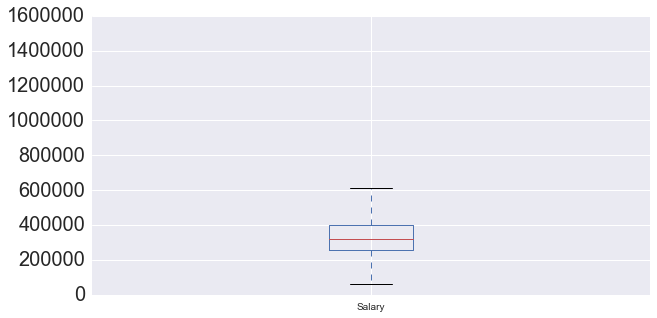

In [79]:
plt.figure(figsize=(10,5))
salary = data.loc[:,['Salary','Designation']]
salary = salary.ix[salary['Designation']=='software engineer']
salary.boxplot()
Q1 = salary['Salary'].quantile(0.25)
Q3 = salary['Salary'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR = ",(IQR))
threshold_upper = Q3 + 1.5*IQR 
threshold_lower = Q1- 1.5*IQR
print("Upper threshhold :",threshold_upper)
print("Lower threshhold :",threshold_lower)
salary_new = salary.loc[(salary['Salary'] < threshold_upper) & (salary['Salary'] > threshold_lower)]
print("Mean",salary_new.mean())
under_employed = salary_new[salary_new['Salary'] < int(salary_new.mean())].shape[0]
percentage = (under_employed/salary.shape[0])*100
print("Total underemployment amoung Software Engineers : ", percentage,'%')

*Nearly 51% of all Software Engineers are UNDEREMPLOYED*

Some more analytics soon to follow: Salary vs all_remaining_stats, Salary Distribution (Histogram), pie chart for kinds of jobs amoung Computer Engineers, Spatial Viz (Difficult- Map of India). 

ML- We can go ahead with PCA due to large number of features. Then test accuracy against different regressors.

Estimated Time to do the above: 2 Days

Other data sets under considration: Education in india